# Import library

In [253]:
# pip install metapy-toolbox
from metapy_toolbox import genetic_algorithm_01
from my_example import my_obj_function_rafael

# Setup

In [254]:
# Algorithm setup
none_variable = {
                    'd (m) - perfil original': 0.616,
                    'b_f (m) - perfil original': 0.325,
                    't_f (m) - perfil original': 0.0216,
                    't_w (m) - perfil original': 0.014,
                    'k (m) - perfil original': 1.45,
                    'h_c (m) - perfil original': 0.05,
                    'r_y (m) - perfil original': 0.016,
                    'rho (kN/m3) - peso específico': 78.60,
                    'vão da viga (m)': 12,
                    'g_k (kN) - carga permanente': 18,
                    'q_k1 (kN) - carga variável principal': 9.0,
                    'q_k2 (kN) - carga variável secundária': 1.50,
                    'f_yd (kN/m²) - resistência ao escoamento do aço': 345E3,
                    'gamma_a1 - coeficiente de ponderação da resistência do aço': 1.10,
                    'gamma_g - coeficiente de ponderação das ações permanentes': 1.50,
                    'gamma_q1 - coeficiente de ponderação das ações var. princ.': 1.50,
                    'gamma_q2 - coeficiente de ponderação das ações var. secun.': 1.25,
                    'psi_0': 0.5,
                    'psi_2': 0.3,
                    'modulo E (kPa)': 200E6,
                    'modulo G (kPa)': 77E6,
                    'impressao': False
                }
    
setup = {   
            'number of iterations': 100,
            'number of population': 20,
            'number of dimensions': 2,
            'x pop lower limit': [1.05, 0.80],
            'x pop upper limit': [2.00, 2.00],
            'none variable': none_variable,
            'objective function': my_obj_function_rafael,
            'algorithm parameters': {
                                     'selection': {'type': 'roulette'},
                                     'crossover': {'crossover rate (%)': 85, 'type':'linear'},
                                     'mutation': {'mutation rate (%)': 15, 'type': 'hill climbing', 'cov (%)': 15, 'pdf': 'gaussian'},
                                    }
        }


from metapy_toolbox import initial_population_01
init_pop = initial_population_01(setup['number of population'],
                                setup['number of dimensions'],
                                setup['x pop lower limit'],
                                setup['x pop upper limit'])

# Seed
seed = None

# Call function

In [255]:
settings = [setup, init_pop, seed]
df_all_results, df_resume, time_cost, report = genetic_algorithm_01(settings)

Progress:   0%|          | 0/100 [00:00<?, ?it/s]

Progress: 100%|██████████| 100/100 [00:01<00:00, 76.12it/s]


# Output details

In [256]:
df_all_results

,X_0,X_1,OF,FIT,ITERATION
0,1.510364,1.737053,5.134310e+07,1.947681e-08,0
1,1.846223,1.268497,2.420846e+08,4.130788e-09,0
2,1.250463,1.426173,2.806246e+06,3.563478e-07,0
3,1.117201,1.777143,5.600385e+06,1.785591e-07,0
4,1.939069,1.336358,1.324452e+12,7.550290e-13,0
...,...,...,...,...,...
2015,1.215501,1.317515,1.633878e+00,3.796683e-01,100
2016,1.215501,1.317515,1.633878e+00,3.796683e-01,100
2017,1.215501,1.317515,1.633878e+00,3.796683e-01,100
2018,1.588075,1.642440,2.980149e+06,3.355536e-07,100


In [257]:
df_resume.tail()

,X_0,X_1,OF BEST,FIT BET,ID BEST,X_0,X_1,OF WORST,FIT WORST,ID WORST,OF AVG,FIT AVG,ITERATION,neof
96,1.215501,1.317515,1.633878,0.379668,0,2.0,1.525186,336488.390827,0.000003,11,26997.996464,0.341702,96,5300
97,1.215501,1.317515,1.633878,0.379668,5,2.0,1.525186,336488.390827,0.000003,11,26997.996464,0.341702,97,5351
98,1.215501,1.317515,1.633878,0.379668,1,2.0,1.525186,336488.390827,0.000003,11,26997.996464,0.341702,98,5400
99,1.215501,1.317515,1.633878,0.379668,1,2.0,1.525186,336488.390827,0.000003,11,26997.996464,0.341702,99,5451
100,1.215501,1.317515,1.633878,0.379668,8,2.0,1.525186,336488.390827,0.000003,11,26997.996464,0.341702,100,5508


# Report

### txt

In [258]:
filename = "report_genetic_algorithm_01.txt"
with open(filename, "w") as f:
    f.write(report)

### xlsx

In [259]:
filename = "report_genetic_algorithm_01.xlsx"
df_resume.to_excel(filename, index=False)

# Graphical analysis

In [260]:
from EASYPLOT_TOOLBOX import *

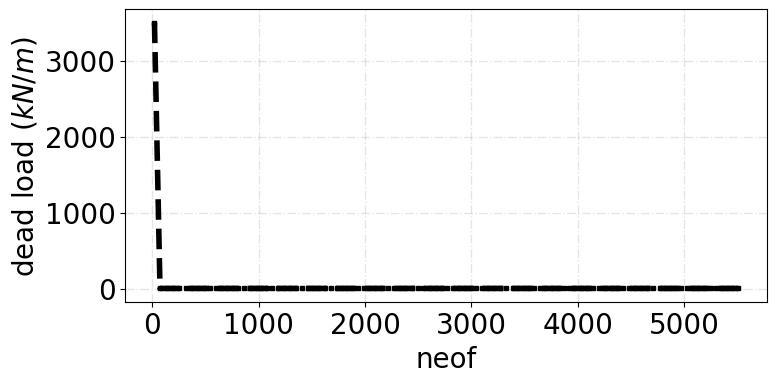

<Figure size 640x480 with 0 Axes>

In [261]:
# Data
DF =  {'x0': df_resume['neof'],
                    'y0': df_resume['OF BEST']
}

# Chart setup
CHART_CONFIG = {
              'NAME': 'figure5',
              'WIDTH': 20, 
              'HEIGHT': 10,
              'MARKER': ['s'],
              'MARKER SIZE': [3],
              'LINE WIDTH': [4],
              'LINE STYLE': ['--'],
              'X AXIS LABEL': 'neof',
              'X AXIS SIZE': 20,
              'Y AXIS LABEL': 'dead load ($kN/m$)',
              'Y AXIS SIZE': 20,
              'AXISES COLOR': '#000000',
              'LABELS SIZE': 20,
              'LABELS COLOR': '#000000',
              'CHART COLOR': ['#000000'],
              'x limit': None,
              'y limit': None,
              'ON GRID?': True,
              'LEGEND': [None], # or without legend 'LEGEND': [None]
              'legend location': 'upper right',
              'SIZE LEGEND': 12,
              'Y LOG': False,
              'X LOG': False,
              'dots per inch': 200, 
              'EXTENSION': 'svg'
             }

# Data statement 
DATA = {'DATASET': DF}

# Call function
line_chart(dataset=DATA, plot_setup=CHART_CONFIG)
